In [2]:
import random
import string
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy.matlib as npmatlib
%matplotlib inline

import dataloader
import util

#load data
dataset = dataloader.DataLoader(verbose=True)
x_train, x_test, y_train, y_test, y_reg_train, y_reg_test = dataset.load_data()

#vectorize the images and data
x_train = np.reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]]).T
x_test = np.reshape(x_test, [x_test.shape[0], x_test.shape[1]*x_test.shape[2]]).T
y_reg_train = y_reg_train.T
y_reg_test = y_reg_test.T

#forward model (i.e. simualator)
G = np.load('G.npy')

#color by label
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=9)
cs = my_cmap(my_norm(y_test))

print(x_train.shape)
print(x_test.shape)
print(y_reg_train.shape)
print(y_reg_test.shape)
print(G.shape)

Loaded training data x (60000, 28, 28, 1) and y (60000, 128) and y_labels (60000,)
Loaded testing data x (10000, 28, 28, 1) and y (10000, 128) and y_labels (10000,)
(784, 60000)
(784, 10000)
(128, 60000)
(128, 10000)
(784, 128)


In [3]:
#linear least square solution
sz = 28
ref = 3
num_samples = 100

ms = (np.linalg.pinv(G.T@G)@G.T).T@y_reg_test[:, 0:num_samples]
print(ms.shape)

(784, 100)


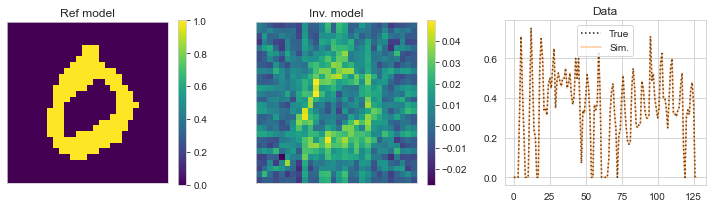

In [4]:
#visualize the inverted model
m_ref = x_test[:, ref:ref+1]
m_sol = ms[:, ref:ref+1]

#forward simulation on the inverted model
y_sim = (m_sol.T@G).T

#compare model and data (i.e. reference case vs solution)
f = plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(np.reshape(m_ref, [sz, sz]), cmap="viridis", vmin=0, vmax=1, aspect='equal')
plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.title("Ref model")

plt.subplot(1, 3, 2)
plt.imshow(np.reshape(m_sol, [sz, sz]), cmap="viridis", aspect='equal')
plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.title("Inv. model")

plt.subplot(1, 3, 3)
plt.plot(y_reg_test[:, ref], ls=':', c='k', label='True', alpha=0.9)
plt.plot(y_sim, c=cs[y_test[ref]], label='Sim.', alpha=0.4)
#plt.ylim([0, 1])
plt.title("Data")
plt.legend()

plt.tight_layout()
f.savefig('readme/llsq.png')